In [1]:
import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
engine = create_engine("sqlite:///../db/apache.sqlite")
base= automap_base()
base.prepare(engine, reflect=True)
inspector = inspect(engine)
log_table = base.classes.access_response
session = Session(engine)

In [3]:
date_range_2018 = 'select * from access_response where DateTime like "%2018%"'
date_range_2018_results= pd.read_sql_query(date_range_2018, session.bind)

In [4]:
#date_range_2018_results.info()

In [5]:
everything = 'select * from access_response'
everything_df = pd.read_sql_query(everything, session.bind)

In [6]:
everything_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30692 entries, 0 to 30691
Data columns (total 12 columns):
id              30692 non-null int64
ip              30692 non-null object
DateTime        30692 non-null object
TimeZone        30692 non-null object
Method          30692 non-null object
URL             30692 non-null object
ResponseCode    30692 non-null object
Referer         30692 non-null object
BytesSent       30692 non-null object
UserAgent       30692 non-null object
latitude        30675 non-null float64
longitude       30675 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 2.8+ MB


In [7]:
len(date_range_2018_results)

5442

In [8]:
admin_query = 'select id from access_response where URL like "%admin%" and DateTime like "2018%"'
admin_results = pd.read_sql_query(admin_query, session.bind)

In [9]:
admin_results['admin'] = 'admin'

In [10]:
everything_df = pd.merge(everything_df, admin_results, how='outer', on='id')

In [11]:
setup_query = 'select id from access_response where URL like "%setup%" and DateTime like "2018%"'
setup_results = pd.read_sql_query(setup_query, session.bind)

In [12]:
#setup_results

In [13]:
len(setup_results)

477

In [14]:
setup_results['setup'] = 'setup'

In [15]:
#setup_results

In [16]:
everything_df = pd.merge(everything_df, setup_results, how='outer', on='id')

In [17]:
login_query = 'select id from access_response where URL like "%login%" and DateTime like "2018%"'
login_results = pd.read_sql_query(login_query, session.bind)

In [18]:
#login_results

In [19]:
len(login_results)

57

In [20]:
login_results['login'] = 'login'

In [21]:
everything_df = pd.merge(everything_df, login_results, how='outer', on='id')

In [22]:
test_query = 'select id from access_response where URL like "%test%" and DateTime like "2018%"'
test_results = pd.read_sql_query(test_query, session.bind)

In [23]:
test_results['test'] = 'test'

In [24]:
len(test_results)

13

In [25]:
#test_results

In [26]:
everything_df = pd.merge(everything_df, test_results, how='outer', on='id')

In [27]:
login_query = 'select id from access_response where URL like "%login%" and DateTime like "2018%"'
login_results = pd.read_sql_query(login_query, session.bind)

In [28]:
#login_results

In [29]:
everything_df = pd.merge(everything_df, login_results, how='outer', on='id')

In [30]:
ramble_query = 'select id from access_response where URL like "%ramble%" and DateTime like "2018%"'
ramble_results = pd.read_sql_query(ramble_query, session.bind)

In [31]:
#ramble_results

In [32]:
len(ramble_results)

158

In [33]:
ramble_results['ramble'] = 'ramble'

In [34]:
everything_df = pd.merge(everything_df, ramble_results, how='outer', on='id')

In [35]:
ua_script_query = 'select id, URL from access_response where UserAgent like "%urll%" or UserAgent like "%curl%" and DateTime like "2018%"'
ua_script_results = pd.read_sql_query(ua_script_query, session.bind)

In [36]:
len(ua_script_results)

330

In [37]:
#ua_script_results

In [38]:
ua_script_results_no_cat = ua_script_results[(ua_script_results.URL != '/phone_pix/cat.jpg')]

In [39]:
#ua_script_results_no_cat

In [40]:
len(ua_script_results_no_cat)

246

In [41]:
ua_script_results['scripts'] = 'scripts'

In [42]:
everything_df = pd.merge(everything_df, ua_script_results, how='outer', on='id')

In [43]:
everything_df = everything_df.drop('URL_y', axis=1)

In [44]:
everything_df = everything_df.fillna('-')

In [45]:
#everything_df['latitude'] = everything_df['latitude'].astype(float) 

In [46]:
admin_percent = (everything_df['admin'].value_counts()[1])/(len(everything_df))*100

In [47]:
setup_percent = (everything_df['setup'].value_counts()[1])/(len(everything_df))*100

In [48]:
login_percent = (everything_df['login'].value_counts()[1])/(len(everything_df))*100

In [49]:
test_percent = (everything_df['test'].value_counts()[1])/(len(everything_df))*100

In [50]:
ramble_percent = (everything_df['ramble'].value_counts()[1])/(len(everything_df))*100

In [51]:
scripts_percent = (everything_df['scripts'].value_counts()[1])/(len(everything_df))*100

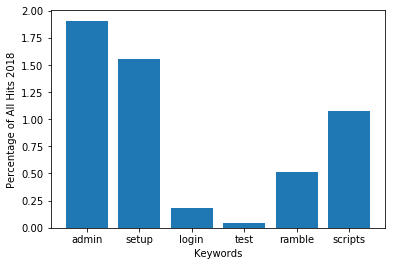

In [52]:
fig,ax = plt.subplots()
plt.bar(x = [1,2,3,4,5,6], height = [admin_percent,setup_percent,login_percent,test_percent,ramble_percent,scripts_percent])
plt.xticks([1,2,3,4,5,6], ['admin','setup','login','test','ramble','scripts'])
plt.xlabel('Keywords')
plt.ylabel('Percentage of All Hits 2018')
plt.savefig('keywords_2018.png')

In [53]:
calls_list = ['ip','admin','setup','login','test','ramble','scripts','URL_x','ResponseCode','latitude','longitude']

In [54]:
calls_list_df = everything_df[calls_list]

In [55]:
len(calls_list_df)

30692

In [56]:
calls_list_df = calls_list_df[(calls_list_df['latitude'] != '-') | (calls_list_df['longitude'] != '-')]

In [57]:
len(calls_list_df)

30675

In [58]:
calls_list_df['latitude']=calls_list_df['latitude'].astype(float)
calls_list_df['longitude']=calls_list_df['longitude'].astype(float)

In [59]:
#calls_list_df.info()

In [118]:
# Create our initial map object
# Set the longitude, latitude, and the starting zoom level
my_map = folium.Map(location=[24.650338, -35.815542], zoom_start=2)#, tiles=outdoors_tile, attr=attr)

In [119]:
admin_filter_df = calls_list_df[calls_list_df['admin'] != '-']

In [120]:
# adding additional overlay layers (featuregroups) can be toggled on or off
# this is called layerGroup in leaflet.js
admin_layer = folium.FeatureGroup(name='Admin')

for i, row in admin_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.CircleMarker([row['latitude'],row['longitude']], color='yellow',fill=True, r=7, opacity=.7,
                  popup="<h2>" + row['ip'] + "</h2>" + "<hr>" + "<h3>" + "URL: " + "</h3>" + "<h4>" + row['URL_x'] + "</h4>" + "<br>" + "<h3>" + "Response code: " + row['ResponseCode'] + "</h3>"
                 ).add_to(admin_layer)

In [121]:
setup_filter_df = calls_list_df[calls_list_df['setup'] != '-']

In [122]:
#setup_filter_df

In [123]:
setup_layer = folium.FeatureGroup(name='Setup')

for i, row in setup_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.CircleMarker([row['latitude'],row['longitude']], color='blue',fill=True, r=7, opacity=.7,
                  popup="<h2>" + row['ip'] + "</h2>" + "<hr>" + "<h3>" + "URL: " + "</h3>" + "<h4>" + row['URL_x'] + "</h4>" + "<br>" + "<h3>" + "Response code: " + row['ResponseCode'] + "</h3>"
                 ).add_to(setup_layer)

In [124]:
login_filter_df = calls_list_df[calls_list_df['login'] != '-']

In [125]:
#login_filter_df

In [126]:
login_layer = folium.FeatureGroup(name='Login')

for i, row in login_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.CircleMarker([row['latitude'],row['longitude']], color='green',fill=True, r=7, opacity=.7,
                  popup="<h2>" + row['ip'] + "</h2>" + "<hr>" + "<h3>" + "URL: " + "</h3>" + "<h4>" + row['URL_x'] + "</h4>" + "<br>" + "<h3>" + "Response code: " + row['ResponseCode'] + "</h3>"
                 ).add_to(login_layer)

In [127]:
test_filter_df = calls_list_df[calls_list_df['test'] != '-']

In [128]:
#test_filter_df

In [129]:
test_layer = folium.FeatureGroup(name='Test')

for i, row in test_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.CircleMarker([row['latitude'],row['longitude']], color='purple',fill=True, r=7, opacity=.7,
                  popup="<h2>" + row['ip'] + "</h2>" + "<hr>" + "<h3>" + "URL: " + "</h3>" + "<h4>" + row['URL_x'] + "</h4>" + "<br>" + "<h3>" + "Response code: " + row['ResponseCode'] + "</h3>"
                 ).add_to(test_layer)

In [130]:
scripts_filter_df = calls_list_df[calls_list_df['scripts'] != '-']

In [131]:
scripts_layer = folium.FeatureGroup(name='Scripts')

for i, row in scripts_filter_df.iterrows():
    # Create a marker and pass in lat lon and city name
    folium.CircleMarker([row['latitude'],row['longitude']], color='red',fill=True, r=7, opacity=.7,
                  popup="<h2>" + row['ip'] + "</h2>" + "<hr>" + "<h3>" + "URL: " + "</h3>" + "<h4>" + row['URL_x'] + "</h4>" + "<br>" + "<h3>" + "Response code: " + row['ResponseCode'] + "</h3>"
                 ).add_to(scripts_layer)

In [132]:
# add the feature group to our map
admin_layer.add_to(my_map) 
setup_layer.add_to(my_map)
login_layer.add_to(my_map)
test_layer.add_to(my_map)
scripts_layer.add_to(my_map)


# add layer control to toggle on/off
folium.LayerControl().add_to(my_map)

# save HTML
my_map.save('keywords_2018.html')

# display the map
my_map